In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR-Employee-Attrition.xlsx to HR-Employee-Attrition.xlsx


In [ ]:
data=pd.read_excel("HR-Employee-Attrition.xlsx")

## Checking For missing Values

In [ ]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Checking Data types

In [ ]:
cols=data.columns
for column in cols:
    print(column,":",data[column].dtype)

Age : int64
Attrition : object
BusinessTravel : object
DailyRate : int64
Department : object
DistanceFromHome : int64
Education : int64
EducationField : object
EmployeeCount : int64
EmployeeNumber : int64
EnvironmentSatisfaction : int64
Gender : object
HourlyRate : int64
JobInvolvement : int64
JobLevel : int64
JobRole : object
JobSatisfaction : int64
MaritalStatus : object
MonthlyIncome : int64
MonthlyRate : int64
NumCompaniesWorked : int64
Over18 : object
OverTime : object
PercentSalaryHike : int64
PerformanceRating : int64
RelationshipSatisfaction : int64
StandardHours : int64
StockOptionLevel : int64
TotalWorkingYears : int64
TrainingTimesLastYear : int64
WorkLifeBalance : int64
YearsAtCompany : int64
YearsInCurrentRole : int64
YearsSinceLastPromotion : int64
YearsWithCurrManager : int64


# Converting Output feature

In [ ]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Object or string Features

In [ ]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object' and col != 'Attrition']

In [ ]:
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# Numeric Features

In [ ]:
categorical_cols=['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']
numeric_cols = [col for col in data.columns if data[col].dtype != 'object' and col != 'Attrition' and col not in categorical_cols]

In [ ]:
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Ordinal Catagiotical Features

# Checking Relationship with ordinal features

In [ ]:
# Threshold for unique values to consider a column as categorical
threshold = 10

# Identify numeric columns that have few unique values
numeric_categorical = [col for col in numeric_cols if data[col].nunique() <= threshold]

print("Numeric columns likely to be categorical:")
print(numeric_categorical)


Numeric columns likely to be categorical:
['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


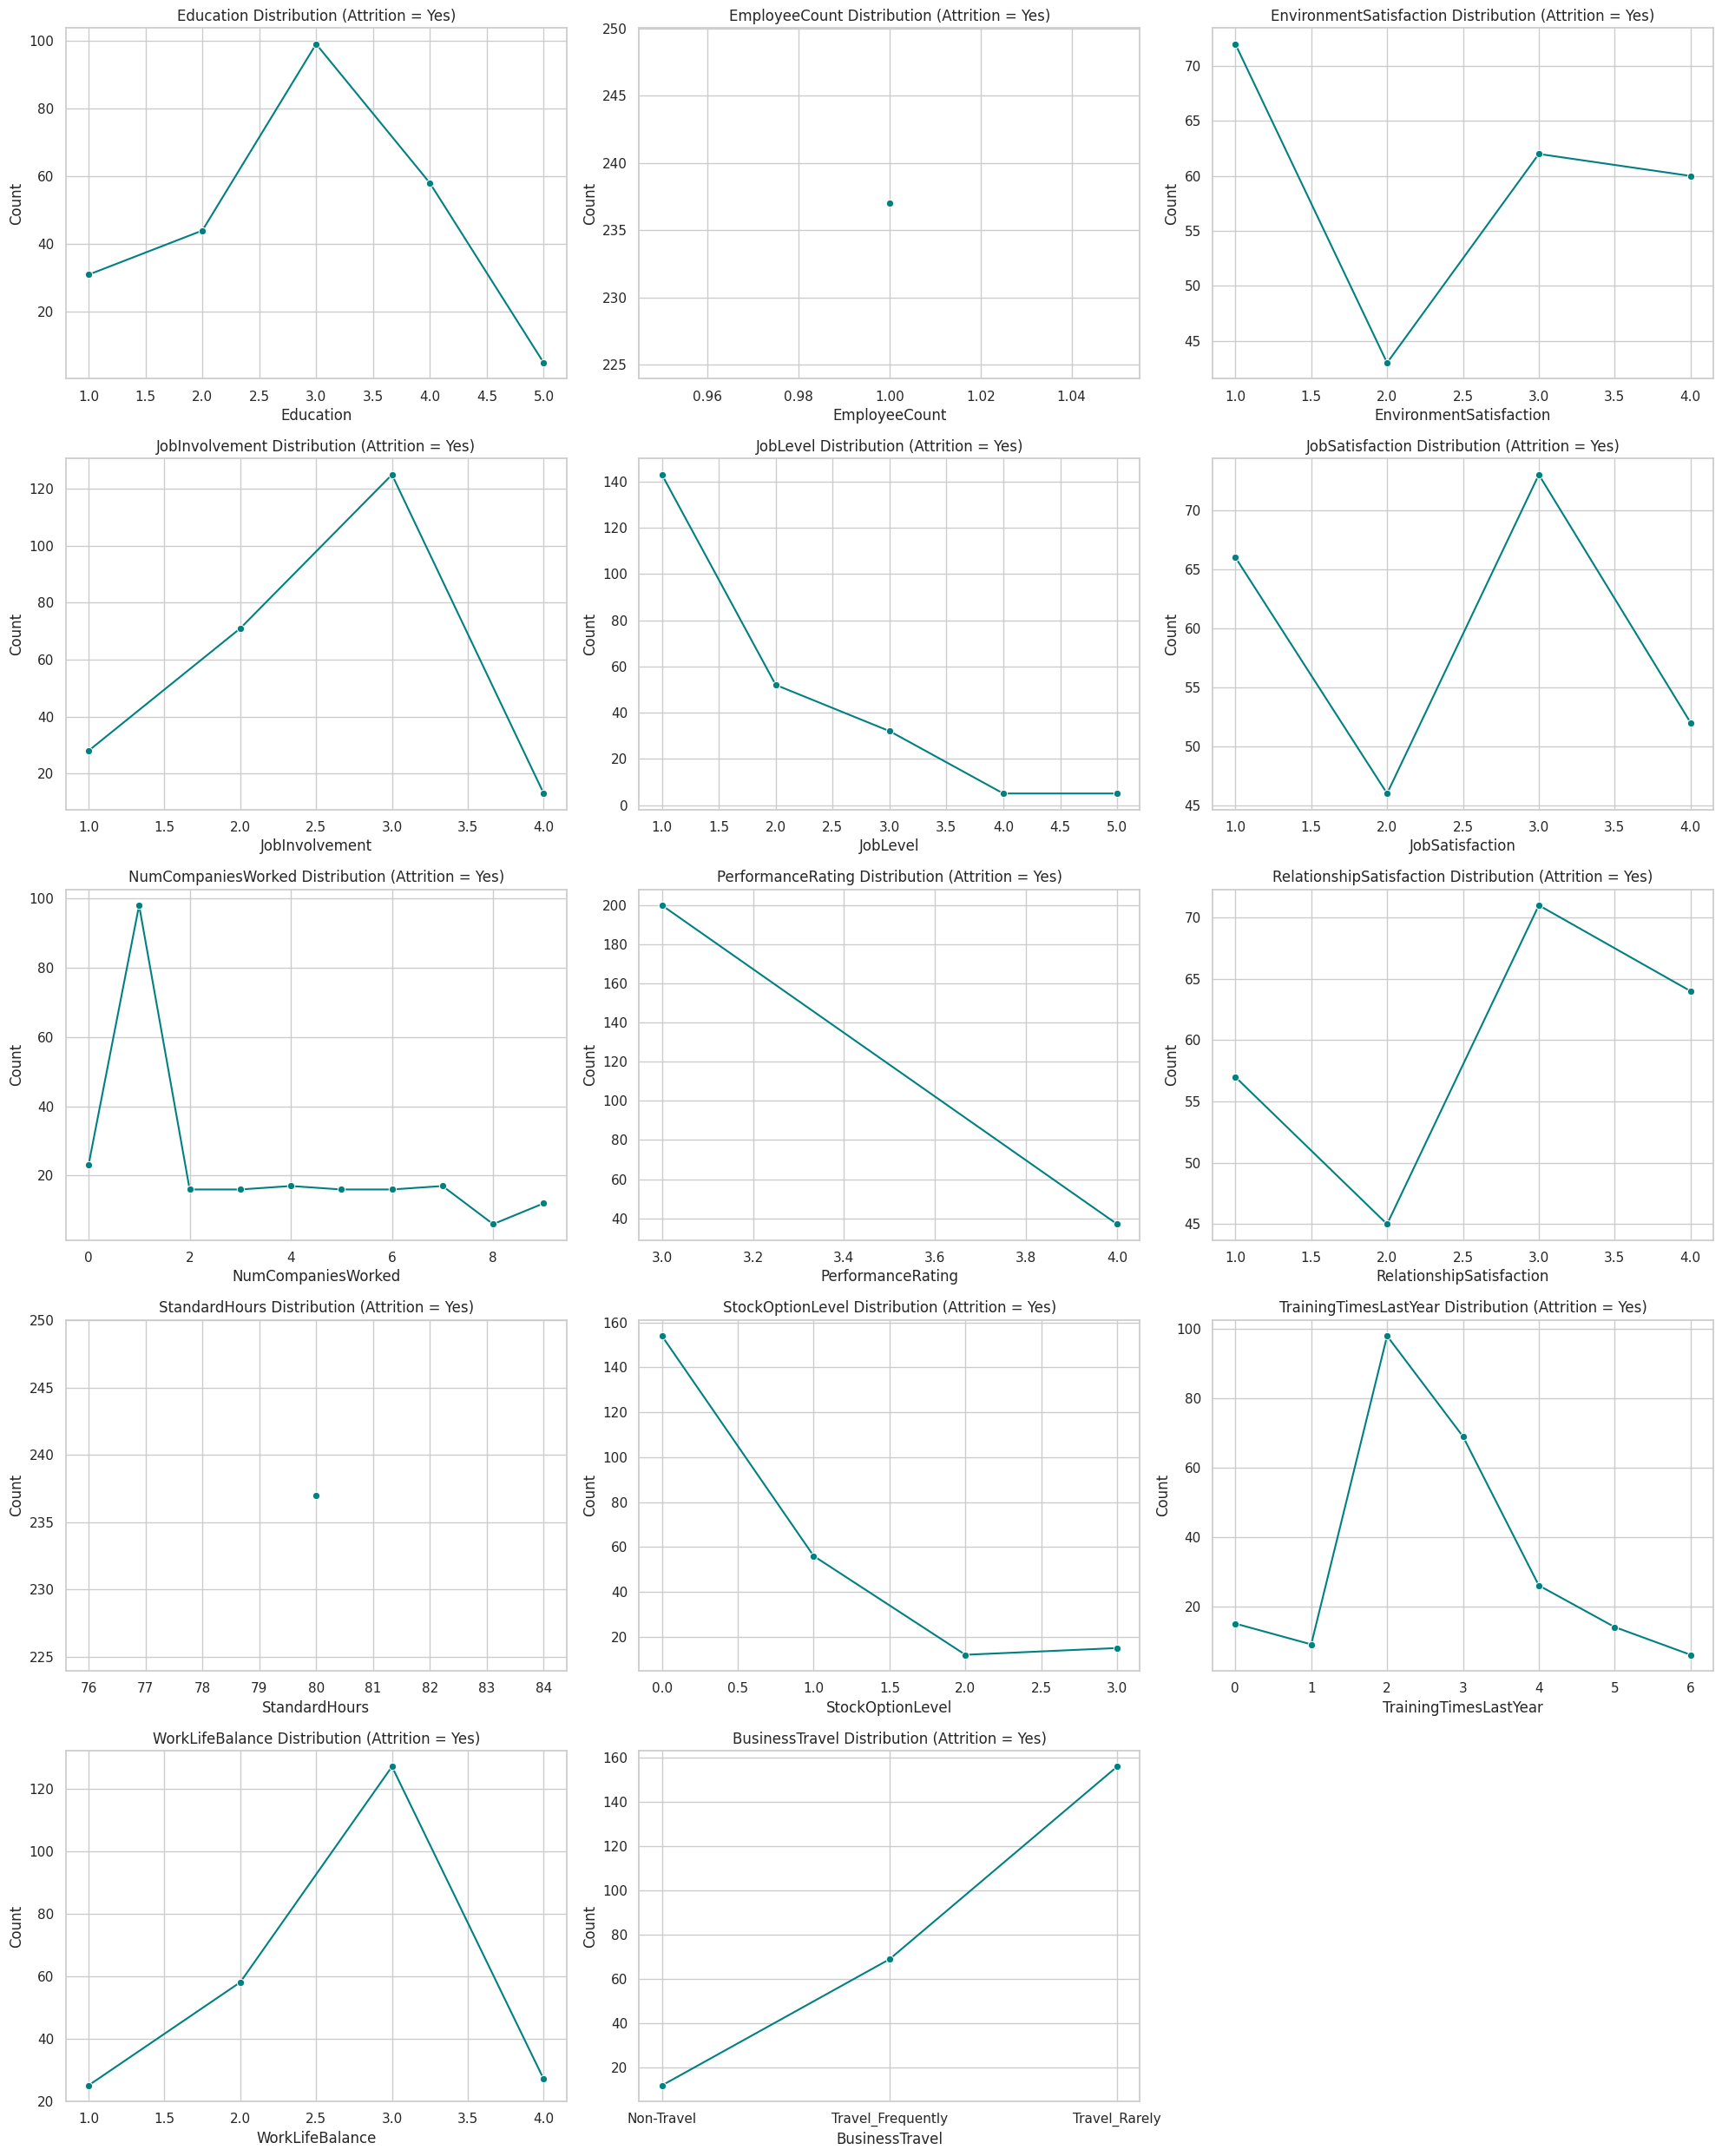

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=data
# Filter dataset for attrition cases
df_attrition = df[df['Attrition'] == 1]

ordinal_cols = [
    'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating',
    'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
    'TrainingTimesLastYear', 'WorkLifeBalance','BusinessTravel'
]

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25))

# Plot each ordinal column as a line chart
for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(5, 3, i)

    # Count values for each category
    value_counts = df_attrition[col].value_counts().sort_index()

    # Plot line chart
    sns.lineplot(x=value_counts.index, y=value_counts.values, marker='o', color='teal')

    plt.title(f'{col} Distribution (Attrition = Yes)')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### As there is no relationship so we treat all these as nominal variables  

In [ ]:
# Select categorical columns with ≤ 5 unique values
limited_cat_cols = [col for col in categorical_cols if data[col].nunique() <= 5]

# Create dummy variables
data_dummies = pd.get_dummies(data[limited_cat_cols], drop_first=True)

# Optionally, concatenate with original data
data = pd.concat([data.drop(columns=limited_cat_cols), data_dummies], axis=1)

In [ ]:
# Re-define categorical_cols just to be safe
categorical_cols = [col for col in data.columns if data[col].dtype == 'object' and col != 'Attrition']

# Filter high-cardinality columns
high_card_cols = [col for col in categorical_cols if data[col].nunique() > 5]

# Encode top 10 frequent categories only
for col in high_card_cols:
    top_10 = data[col].value_counts().nlargest(10).index
    data[col] = data[col].where(data[col].isin(top_10), other='Other')

# Apply one-hot encoding
data_high_card_dummies = pd.get_dummies(data[high_card_cols], drop_first=True)

# Merge with original data
data = pd.concat([data.drop(columns=high_card_cols), data_high_card_dummies], axis=1)


In [ ]:
data.dtypes

,0
Age,int64
Attrition,int64
DailyRate,int64
DistanceFromHome,int64
Education,int64
EmployeeCount,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64
HourlyRate,int64
JobInvolvement,int64


## Also doing one hot coding for numaric catagorical columns

In [ ]:
# Drop columns with only one unique value (already done earlier)
ordinal_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
    'WorkLifeBalance'
]

# Apply one-hot encoding
data_dummies = pd.get_dummies(data[ordinal_cols], drop_first=True)

# Merge with original dataset
data = pd.concat([data.drop(columns=ordinal_cols), data_dummies], axis=1)


# Removing Unnecessory columns

In [ ]:
data = data.drop(['StandardHours', 'EmployeeCount'], axis=1)

In [ ]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,...,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,1,1102,1,1,94,5993,19479,11,8,...,2,3,2,4,8,3,1,0,0,1
1,49,0,279,8,2,61,5130,24907,23,10,...,3,2,2,2,1,4,4,1,3,3
2,37,1,1373,2,4,92,2090,2396,15,7,...,4,2,1,3,6,3,2,0,3,3
3,33,0,1392,3,5,56,2909,23159,11,8,...,4,3,1,3,1,3,3,0,3,3
4,27,0,591,2,7,40,3468,16632,12,6,...,1,3,1,2,9,3,4,1,3,3


### If the main objective is to retain talent then we can compromise precision and logistic regration is best for this case otherwise xgboost is good for accuracy

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE + ENN (oversampling + cleaning)
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Train logistic regression
logreg = LogisticRegression(class_weight='balanced', solver='saga', max_iter=7000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = logreg.predict(X_test)
y_probs = logreg.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))


Confusion Matrix:
 [[173  74]
 [ 13  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80       247
           1       0.31      0.72      0.44        47

    accuracy                           0.70       294
   macro avg       0.62      0.71      0.62       294
weighted avg       0.83      0.70      0.74       294

ROC-AUC Score: 0.7806012576449306


## Now training using XGboost model


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': 4,
    'learning_rate': 0.1,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc',
    'seed': 42
}

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=20,
    verbose_eval=True
)

# Predict
y_probs_xgb = xgb_model.predict(dtest)
y_pred_xgb = (y_probs_xgb > 0.4).astype(int)


[0]	eval-auc:0.67844
[1]	eval-auc:0.71720
[2]	eval-auc:0.77548
[3]	eval-auc:0.77927
[4]	eval-auc:0.75446
[5]	eval-auc:0.74787
[6]	eval-auc:0.74722
[7]	eval-auc:0.74412
[8]	eval-auc:0.73456
[9]	eval-auc:0.73327
[10]	eval-auc:0.74029
[11]	eval-auc:0.74528
[12]	eval-auc:0.74778
[13]	eval-auc:0.75011
[14]	eval-auc:0.76156
[15]	eval-auc:0.75803
[16]	eval-auc:0.76191
[17]	eval-auc:0.76337
[18]	eval-auc:0.76630
[19]	eval-auc:0.77095
[20]	eval-auc:0.77896
[21]	eval-auc:0.77250
[22]	eval-auc:0.76854


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict using best iteration
y_probs_xgb = xgb_model.predict(dtest)
y_pred_xgb = (y_probs_xgb > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs_xgb))


Confusion Matrix:
 [[221  26]
 [ 26  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.45      0.45      0.45        47

    accuracy                           0.82       294
   macro avg       0.67      0.67      0.67       294
weighted avg       0.82      0.82      0.82       294

ROC-AUC Score: 0.7597553622189681


In [ ]:
import pickle

# Save the fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the column names after encoding
model_columns = X.columns.tolist()
with open("model_columns.pkl", "wb") as f:
    pickle.dump(model_columns, f)

# Save the trained model
xgb_model.save_model("xgb_model.json")


In [ ]:
import pandas as pd
import xgboost as xgb
import pickle

# Load preprocessing artifacts
scaler = pickle.load(open("scaler.pkl", "rb"))
columns = pickle.load(open("model_columns.pkl", "rb"))

# Load trained model
xgb_model = xgb.Booster()
xgb_model.load_model("xgb_model.json")

def preprocess_user_input(user_input_dict):
    # Convert input to DataFrame
    input_df = pd.DataFrame([user_input_dict])

    # Drop columns removed during training
    input_df = input_df.drop(columns=["StandardHours", "EmployeeCount"], errors="ignore")

    # One-hot encode categorical features
    input_df = pd.get_dummies(input_df)

    # Align with training columns
    input_df = input_df.reindex(columns=columns, fill_value=0)

    # Scale numeric features
    input_scaled = scaler.transform(input_df)

    # Convert to DMatrix
    dmatrix = xgb.DMatrix(input_scaled)
    return dmatrix

def predict_attrition(user_input_dict, threshold=0.5):
    dmatrix = preprocess_user_input(user_input_dict)
    prob = xgb_model.predict(dmatrix)[0]
    prediction = int(prob > threshold)
    return {"Attrition": prediction, "Probability": round(float(prob), 4)}

# Example input from UI
user_input = {
    "Age": 29,
    "BusinessTravel": "Travel_Rarely",
    "DailyRate": 800,
    "Department": "Sales",
    "DistanceFromHome": 5,
    "Education": 3,
    "EducationField": "Marketing",
    "EmployeeNumber": 1001,
    "EnvironmentSatisfaction": 3,
    "Gender": "Female",
    "HourlyRate": 55,
    "JobInvolvement": 2,
    "JobLevel": 1,
    "JobRole": "Sales Executive",
    "JobSatisfaction": 4,
    "MaritalStatus": "Single",
    "MonthlyIncome": 4500,
    "MonthlyRate": 18000,
    "NumCompaniesWorked": 1,
    "Over18": "Y",
    "OverTime": "Yes",
    "PercentSalaryHike": 12,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 3,
    "StockOptionLevel": 1,
    "TotalWorkingYears": 6,
    "TrainingTimesLastYear": 2,
    "WorkLifeBalance": 3,
    "YearsAtCompany": 4,
    "YearsInCurrentRole": 2,
    "YearsSinceLastPromotion": 1,
    "YearsWithCurrManager": 2
}
user_input_1 = {
    "Age": 26,
    "BusinessTravel": "Travel_Frequently",
    "DailyRate": 950,
    "Department": "Sales",
    "DistanceFromHome": 25,
    "Education": 2,
    "EducationField": "Life Sciences",
    "EmployeeNumber": 2045,
    "EnvironmentSatisfaction": 1,
    "Gender": "Male",
    "HourlyRate": 48,
    "JobInvolvement": 1,
    "JobLevel": 1,
    "JobRole": "Sales Representative",
    "JobSatisfaction": 1,
    "MaritalStatus": "Single",
    "MonthlyIncome": 2800,
    "MonthlyRate": 18000,
    "NumCompaniesWorked": 4,
    "Over18": "Y",
    "OverTime": "Yes",
    "PercentSalaryHike": 11,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 1,
    "StockOptionLevel": 0,
    "TotalWorkingYears": 3,
    "TrainingTimesLastYear": 1,
    "WorkLifeBalance": 1,
    "YearsAtCompany": 2,
    "YearsInCurrentRole": 1,
    "YearsSinceLastPromotion": 0,
    "YearsWithCurrManager": 1
}

# Run prediction
result = predict_attrition(user_input_1)
if result["Attrition"] == 1:
    message = f"⚠️ High risk of attrition ({result['Probability']*100:.1f}%)"
else:
    message = f"✅ Low risk of attrition ({result['Probability']*100:.1f}%)"
print(message)



⚠️ High risk of attrition (75.6%)


In [ ]:
from google.colab import files
files.download("scaler.pkl")
files.download("model_columns.pkl")
files.download("xgb_model.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>